# DonorsChoose Assignment


<b>Reference : </b>

    1. https://www.oreilly.com/library/view/deep-learning/9781491924570/ch08.html
    2. https://github.com/oreillymedia/t-SNE-tutorial
    3. https://github.com/harrismohammed/DonorsChoose.org---Bow-tfidf-avgw2v-tfidfw2v-tsne-EDA


## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
#Importing all required packages

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer



from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import plotly 
plotly.offline.init_notebook_mode(connected = True)
import plotly.offline as offline

import plotly.graph_objs as go
from collections import Counter


## 1.1 Reading Data

In [2]:
# Reading Data

project_data = pd.read_csv("train_data.csv")
resource_data = pd.read_csv("resources.csv")



In [3]:
print("Number of Data Points in the training data ", project_data.shape)
print("\n" , "-" *50, "\n")

print("The Attributes of the data : ", project_data.columns.values)


Number of Data Points in the training data  (109248, 17)

 -------------------------------------------------- 

The Attributes of the data :  ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in resource data ", resource_data.shape)
print("The Attributes of the resource dataset are ", resource_data.columns.values)
resource_data.head(2)

Number of data points in resource data  (1541272, 4)
The Attributes of the resource dataset are  ['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 Data Analysis

The number of projects that are approved for funding  92706 , ( 84.85830404217927 %)
The Number of projects that are not approved for funding  16542 , ( 15.141695957820739 %)


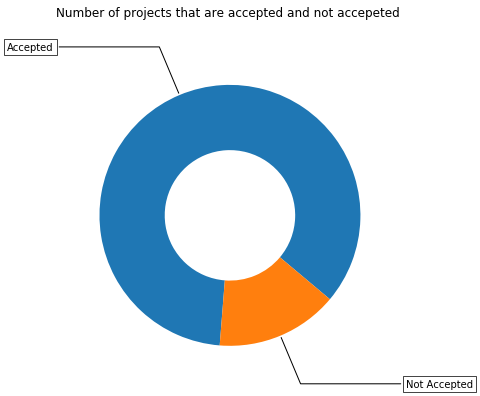

In [5]:
# Accepted and Not Accepted Graph

y_value_counts = project_data["project_is_approved"].value_counts()
print("The number of projects that are approved for funding ", y_value_counts[1], ", (" ,(y_value_counts[1]/(y_value_counts[1] + y_value_counts[0])) *100, "%)")
print("The Number of projects that are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1] + y_value_counts[0]))*100, "%)")

fig, ax = plt.subplots(figsize = (6,6), subplot_kw = dict(aspect = "equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops = dict(width = 0.5), startangle = -40)

bbox_props = dict(boxstyle = "square, pad=0.3", fc = "w", ec = "k" , lw = 0.72)
kw = dict(xycoords = "data", textcoords = "data", arrowprops = dict(arrowstyle = "-"), bbox = bbox_props, zorder = 0, va = "center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)
    
ax.set_title("Number of projects that are accepted and not accepeted \n\n")

plt.show()

# Observation 

    - From above pie chart visualization, the project approval has 
        * Accepted rate with 85%
        * Not Accepted rate with 15%

## 1.2.1 Univariate Analysis : School State



In [6]:

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
temp.columns = ["state_code", "num_proposals"]

scl = [[0.0, "rgb(242, 240, 247)"], [0.2, "rgb(218,218,235)"],[0.4, "rgb(188,189,220)"], [0.6, "rgb(158,154,200)"],[0.8, "rgb(117,107,177)"], [1.0, "rgb(84,39,143)"]]

data = [ dict(
        type = "choropleth",
        colorscale = scl,
        autocolorscale = False,
        locations = temp["state_code"],
        z = temp["num_proposals"].astype(float),
        locationmode = "USA-states",
        text = temp["state_code"],
        marker = dict(line = dict(color = "rgb(255,255,255)",width = 2)),
        colorbar = dict(title = "% of pro")
    
    )]

layout = dict(
        title = "Project proposals % of Acceptance rates by US states",
        geo = dict(
            scope = "usa",
            projection = dict( type = "albers usa"),
            showlakes = True,
            lakecolor = "rgb(255,255,255)",
        ),
    )

fig = go.Figure(data = data, layout = layout)
offline.iplot(fig, filename = "us-map-heat-map")

plt.show()

In [7]:
temp.sort_values(by = ["num_proposals"], inplace = True)
print("States with lowest % approvals ")
print(temp.head(5))
print("*" * 50)
print("States with highest % approvals ")
print(temp.tail(5))

States with lowest % approvals 
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
**************************************************
States with highest % approvals 
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


# Observation:
    
    - The state DE(Delaware) has highest project submission rate around 89%.
    - The state VT(Vermont) has Least project submission rate around 80%.
     

In [8]:
# Stacked Bar plot Function definition

def stack_plot(data, xtick, col2 = "project_is_approved", col3 = "total"):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize = (20,5))
    
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)
    
    plt.ylabel("Projects")
    plt.title("Number of Projects Approved vs Rejected")
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ("total", "accepted"))
    plt.show()

In [9]:
# univariate_barplots Function definition

def univariate_barplots(data, col1, col2= "project_is_approved", top = False):
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    
    temp["total"] = pd.DataFrame(project_data.groupby(col1)[col2].agg({"total" : "count"})).reset_index()["total"]
    temp["Avg"] = pd.DataFrame(project_data.groupby(col1)[col2].agg({"Avg" : "mean"})).reset_index()["Avg"]
    
    temp.sort_values(by = ["total"], inplace = True, ascending = False)
    
    if top : 
        temp = temp[0:top]
        
    stack_plot(temp, xtick = col1, col2 = col2, col3 = "total")
    print(temp.head(5))
    print("*"*50)
    print(temp.tail(5))

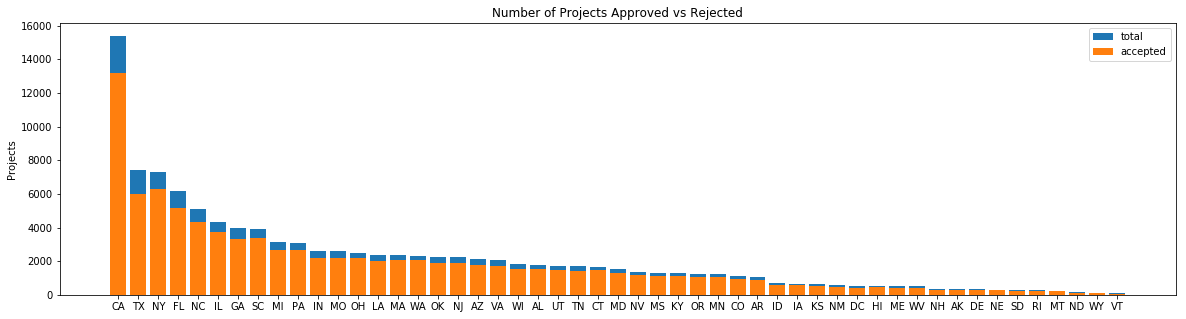

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
**************************************************
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [10]:
# Barplot for School state

univariate_barplots(project_data, "school_state" , "project_is_approved", False)

# Observation :

    - The School State CA (California) has average highest project acceptance rate of 85%.
    - The School State VT (Vermont) has average lowest project acceptance rate with 80%. 

## 1.2.2. Univariate Analysis : Teacher Prefix

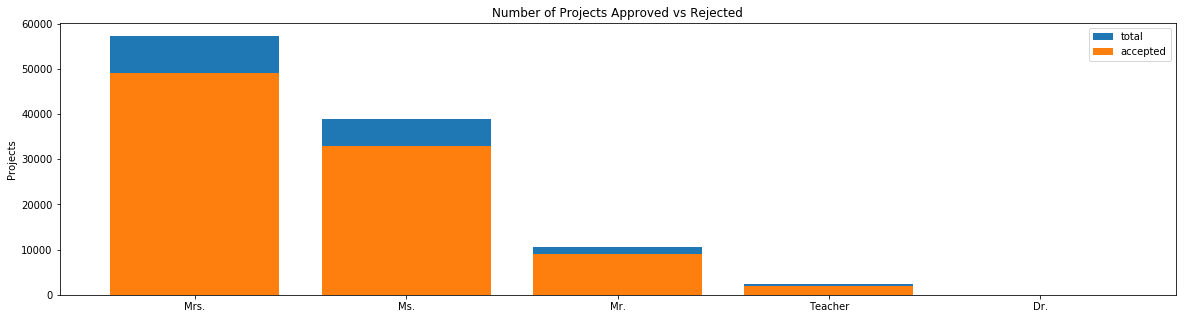

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
**************************************************
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [11]:
# Bar graph for teacher prefix

univariate_barplots(project_data, "teacher_prefix", "project_is_approved" , top = False)

# Observation :
    
        - The Teacher Prefix that has Mrs. has average highest acceptance rate of 85%.
        - while the Teacher Prefix with Dr. has average lowest acceptance rate of 69%.

## 1.2.3 Univariate Analysis : project grade category

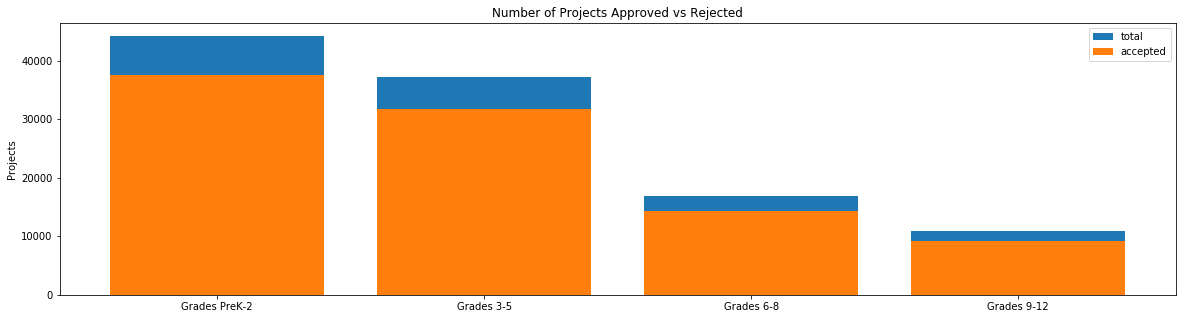

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
**************************************************
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [12]:
# Bar Graph for Project grade category

univariate_barplots(project_data, "project_grade_category", "project_is_approved", top = False)

# Observation :
    
        - Among the Project grade category "Grade PreK-2" has highest approval rate in an average of 84%.
        - while Grades 9-12 has the lowest approval rate in an average of 83%.

## 1.2.4 Univariate Analysis : project subject categories

In [13]:
categories =  list(project_data["project_subject_categories"].values)

cat_list = []
for i in categories:
    temp = ""
    for j in i.split(","):
        if "The" in j.split():
            j = j.replace("The", " ")
        j = j.replace(" ", "")
        temp+=j.strip()+" "
        temp = temp.replace("&", "_")
    cat_list.append(temp.strip())
        

In [14]:
project_data["clean_categories"] = cat_list
project_data.drop(["project_subject_categories"], axis = 1, inplace = True)
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science


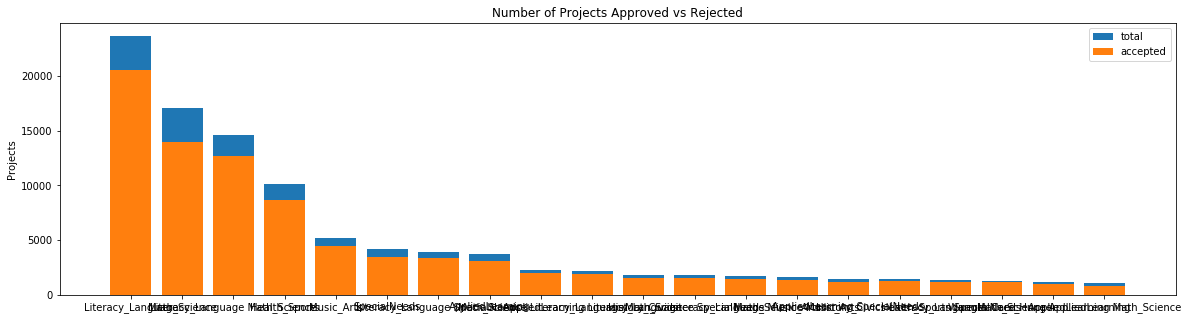

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
**************************************************
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [15]:
univariate_barplots(project_data, "clean_categories", "project_is_approved", top = 20)

# Observation :

    - For the feature project subject category, Literacy Language has the highest average approval rate of 86%.
    - while Applied Learning Math Science has the least average approval rate of 81% among other categories.

In [16]:
from collections import Counter
my_counter = Counter()

for word in project_data["clean_categories"].values:
    my_counter.update(word.split())



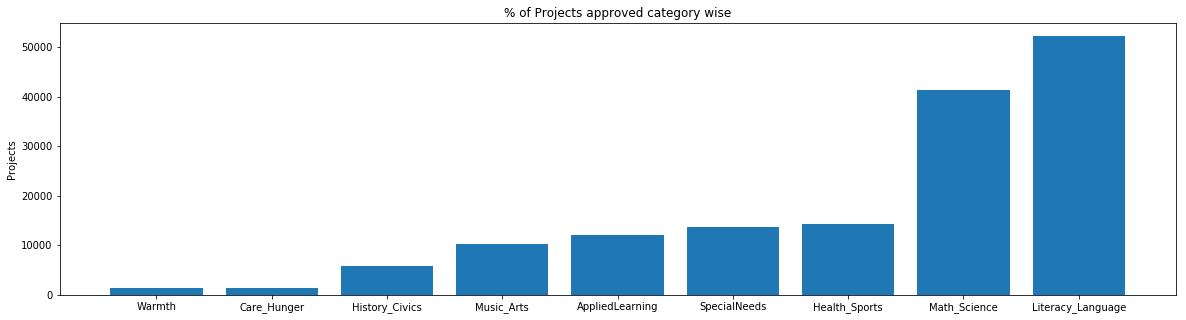

In [17]:
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key = lambda kv : kv[1]))

ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize = (20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel("Projects")
plt.title("% of Projects approved category wise")
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [18]:
for i, j in sorted_cat_dict.items():
    print("{:20} : {:10}".format(i,j))

Warmth               :       1388
Care_Hunger          :       1388
History_Civics       :       5914
Music_Arts           :      10293
AppliedLearning      :      12135
SpecialNeeds         :      13642
Health_Sports        :      14223
Math_Science         :      41421
Literacy_Language    :      52239


# Observation :

    - The Category Literacy language has highest count of project approval i.e. 52239.
    - while Category Warmth and Care Hunger have least count with same value count of 1388. 

## 1.2.5 Univariate Analysis : project_subject_subcategories

In [19]:
sub_categories = list(project_data["project_subject_subcategories"].values)

sub_cat_list = []
for i in sub_categories:
    temp = ""
    
    for j in i.split(","):
        if "The" in j.split():
            j = j.replace("The", '')
        j = j.replace(' ', '')
        temp += j.strip()+ " "
        temp = temp.replace('&',"_")
    
    sub_cat_list.append(temp.strip())

In [20]:
project_data["clean_subcategories"] = sub_cat_list
project_data.drop(["project_subject_subcategories"], axis = 1, inplace = True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


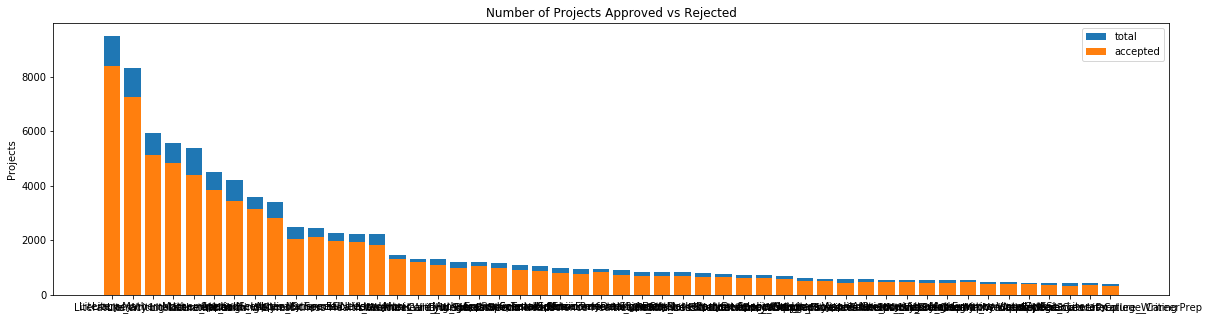

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
**************************************************
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [21]:
univariate_barplots(project_data, "clean_subcategories", "project_is_approved", 50)

# Observation :

    - Among the Project sub Categories Literacy has highest acceptance rate of 88%.
    - while Applied Sciences College Career Prep has least 81% acceptance rate.

In [22]:
from collections import Counter
my_counter = Counter()

for word in project_data["clean_subcategories"].values:
    my_counter.update(word.split())


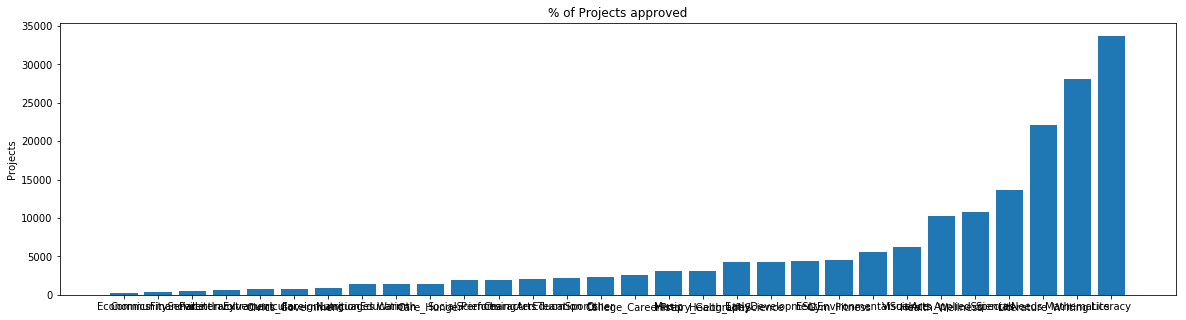

In [23]:
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key = lambda kv : kv[1]))

ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel("Projects")
plt.title("% of Projects approved")
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [24]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} : {:10}".format(i, j))

Economics            :        269
CommunityService     :        441
FinancialLiteracy    :        568
ParentInvolvement    :        677
Extracurricular      :        810
Civics_Government    :        815
ForeignLanguages     :        890
NutritionEducation   :       1355
Warmth               :       1388
Care_Hunger          :       1388
SocialSciences       :       1920
PerformingArts       :       1961
CharacterEducation   :       2065
TeamSports           :       2192
Other                :       2372
College_CareerPrep   :       2568
Music                :       3145
History_Geography    :       3171
Health_LifeScience   :       4235
EarlyDevelopment     :       4254
ESL                  :       4367
Gym_Fitness          :       4509
EnvironmentalScience :       5591
VisualArts           :       6278
Health_Wellness      :      10234
AppliedSciences      :      10816
SpecialNeeds         :      13642
Literature_Writing   :      22179
Mathematics          :      28074
Literacy      

## Observation:

    - Under the sub categories, Economics have least projects approved.
    - while Literacy have highest project approval.

# 1.2.6 Univariate Analysis : Text Features (Title)

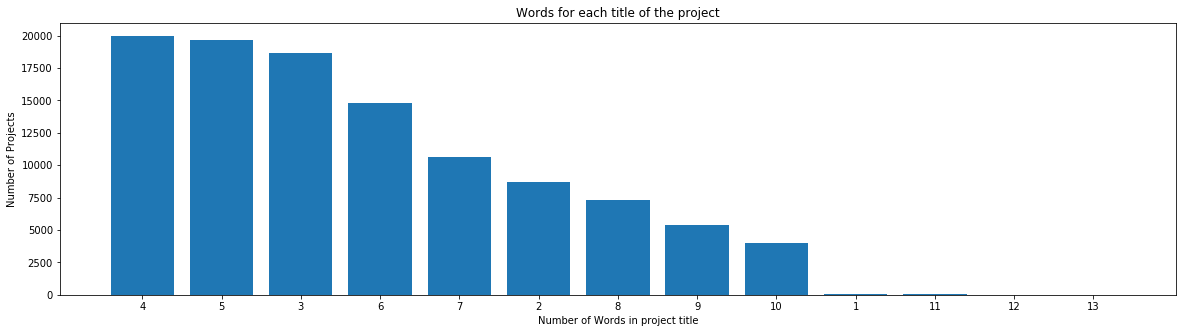

In [25]:
word_count = project_data["project_title"].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_count = dict(sorted(word_dict.items(), key = lambda kv : kv[1]))

ind = np.arange(len(word_dict))
plt.figure(figsize = (20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel("Number of Projects")
plt.xlabel("Number of Words in project title")
plt.title("Words for each title of the project")
plt.xticks(ind, list(word_dict.keys()))
plt.show()

# Observation : 

    - Among the project titles, almost every project titles has 3 - 5 words. 
    - Some projects have 6-10 words but rarely more than 10 words and also only few titles have one word.

In [26]:
approved_title_word_count = project_data[project_data["project_is_approved"] == 1]["project_title"].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data["project_is_approved"] == 0]["project_title"].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

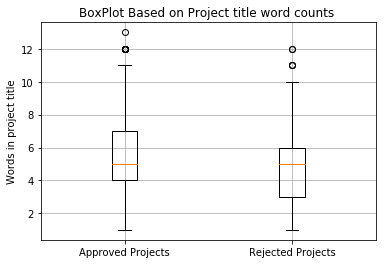

In [27]:
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2], ("Approved Projects" , "Rejected Projects"))
plt.ylabel("Words in project title")
plt.title("BoxPlot Based on Project title word counts ")
plt.grid()
plt.show()

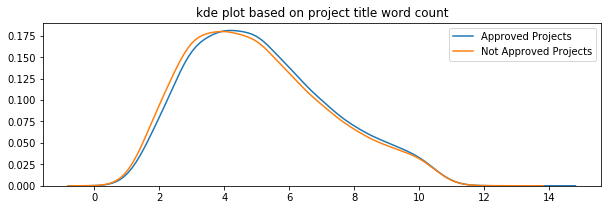

In [28]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count, label = "Approved Projects" , bw = 0.6)
sns.kdeplot(rejected_title_word_count, label = "Not Approved Projects", bw = 0.6)
plt.title("kde plot based on project title word count")
plt.legend()
plt.show()

# Observation :

    - From the graph it could be said as the projects are approved when the word counts exceed
        i.e. more than 4 words have very little higher the chances in acceptance.

# 1.2.7 Univariate Analysis : Text Features (Project Essays)



In [29]:
project_data["essay"] = project_data["project_essay_1"].map(str) + \
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str) 


In [30]:
approved_word_count = project_data[project_data["project_is_approved"] == 1]["essay"].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data["project_is_approved"] == 0]["essay"].str.split().apply(len)
rejected_word_count = rejected_word_count.values


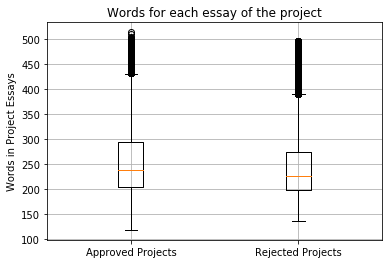

In [31]:
#Box plot for Project essays

plt.boxplot([approved_word_count, rejected_word_count])
plt.title("Words for each essay of the project")
plt.xticks([1,2], ("Approved Projects" , "Rejected Projects"))
plt.ylabel("Words in Project Essays")
plt.grid()
plt.show()

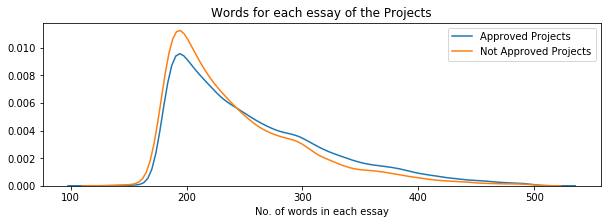

In [32]:
plt.figure(figsize = (10,3))
sns.distplot(approved_word_count, hist = False, label = "Approved Projects")
sns.distplot(rejected_word_count, hist = False, label = "Not Approved Projects")

plt.title("Words for each essay of the Projects")
plt.xlabel("No. of words in each essay")
plt.legend()
plt.show()


# Observation :

    - when the essay words count fall below 250 words then the approval chances is lesser. 
    - while the essay words exceeds more than 250 then it have little higher chances in acceptance. 

# 1.2.8 Univariate Analysis : Cost per project

In [33]:
# Using resource data frame

resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [34]:
price_data = resource_data.groupby("id").agg({"price" : "sum" , "quantity" : "sum"}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [35]:
# Joining two data frames project_data and resource_data

project_data = pd.merge(project_data, price_data, on = "id", how = "left")


In [36]:
approved_price = project_data[project_data["project_is_approved"] ==1]["price"].values
rejected_price = project_data[project_data["project_is_approved"] ==0]["price"].values

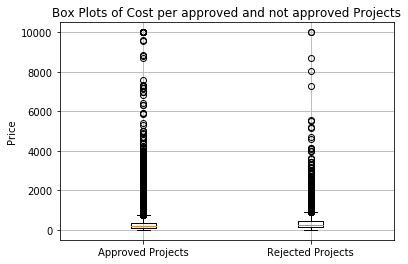

In [37]:
plt.boxplot([approved_price, rejected_price])
plt.title("Box Plots of Cost per approved and not approved Projects")
plt.xticks([1,2], ("Approved Projects" , "Rejected Projects"))
plt.ylabel("Price")
plt.grid()
plt.show()

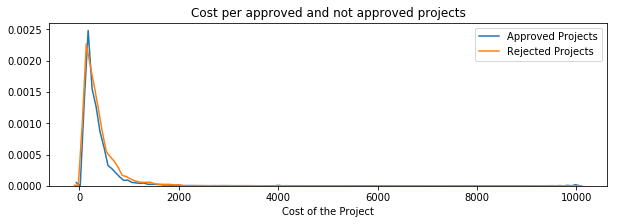

In [38]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist = False, label = "Approved Projects")
sns.distplot(rejected_price, hist = False, label = "Rejected Projects")
plt.title("Cost per approved and not approved projects")
plt.xlabel("Cost of the Project")
plt.legend()
plt.show()

# Observation :

    - almost both the chances in approval and not approval lies below the cost of 2000.
    - while above the cost of 2000 has no chances in acceptance.

In [39]:
# Importing pretty table

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentiles" , "Approved Projects", "Rejected Projects"]

for i in range(0, 101, 5):
    x.add_row([i, np.round(np.percentile(approved_price, i), 3) , np.round(np.percentile(rejected_price, i), 3)])

print(x)

+-------------+-------------------+-------------------+
| Percentiles | Approved Projects | Rejected Projects |
+-------------+-------------------+-------------------+
|      0      |        0.66       |        1.97       |
|      5      |       13.59       |        41.9       |
|      10     |       33.88       |       73.67       |
|      15     |        58.0       |       99.109      |
|      20     |       77.38       |       118.56      |
|      25     |       99.95       |      140.892      |
|      30     |       116.68      |       162.23      |
|      35     |      137.232      |      184.014      |
|      40     |       157.0       |      208.632      |
|      45     |      178.265      |      235.106      |
|      50     |       198.99      |      263.145      |
|      55     |       223.99      |       292.61      |
|      60     |       255.63      |      325.144      |
|      65     |      285.412      |       362.39      |
|      70     |      321.225      |       399.99

# 1.2.9 Univariate Analysis : teacher number of previously posted projects

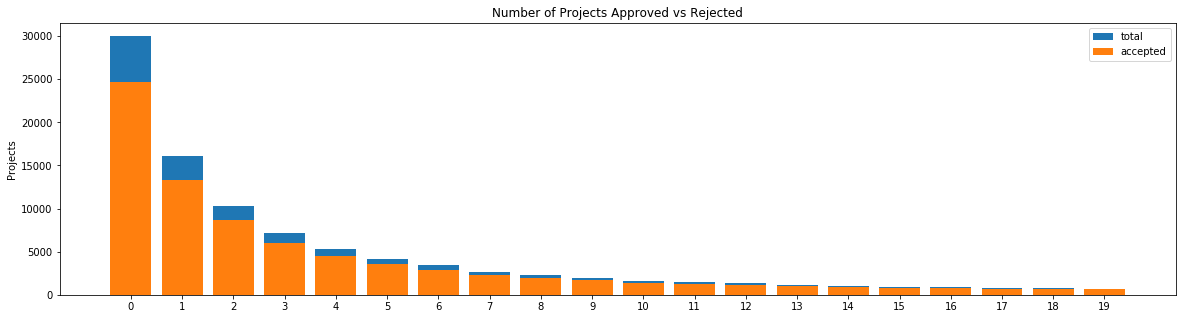

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
**************************************************
    teacher_number_of_previously_posted_projects  project_is_approved  total  \
15                                            15                  818    942   
16                                            16                  769    894   
17                                            17                  712    803   
18                                            18                  666 

In [40]:
univariate_barplots(project_data, "teacher_number_of_previously_posted_projects", "project_is_approved", top = 20)

# Observation :

    - From the graph, it is found that the teacher with the 0 project submissions are higher in total but with lowest average acceptance rate compared to the highest project submissions (19). 
    - while as the no. of projects submission increases, the acceptance rate increases with 89%.
    
    * Thus it could be interpreted as the success rate in approval of project for any number of prior submissions is more than 80%.

# 1.2.10  Univariate Analysis : project resource summary


In [41]:
# reference : https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/


project_data["numericalvalues"] = project_data["project_resource_summary"].apply(lambda x : len([x for x in x.split() \
                                                    if x.isdigit()]))

project_data[["project_resource_summary" , "numericalvalues"]].head()



,project_resource_summary,numericalvalues
0,My students need opportunities to practice beg...,0
1,My students need a projector to help with view...,0
2,"My students need shine guards, athletic socks,...",0
3,My students need to engage in Reading and Math...,0
4,My students need hands on practice in mathemat...,0


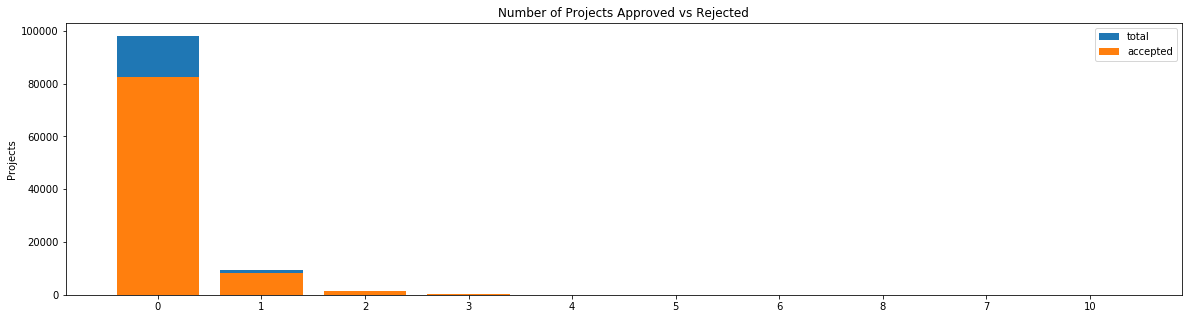

   numericalvalues  project_is_approved  total       Avg
0                0                82562  98011  0.842375
1                1                 8378   9218  0.908874
2                2                 1316   1482  0.887989
3                3                  295    353  0.835694
4                4                   94    113  0.831858
**************************************************
   numericalvalues  project_is_approved  total       Avg
5                5                   38     44  0.863636
6                6                   18     20  0.900000
8                8                    3      4  0.750000
7                7                    1      2  0.500000
9               10                    1      1  1.000000


In [42]:
univariate_barplots(project_data, 'numericalvalues', 'project_is_approved', top=50)

# Observation :

    - From the above visualization, there are many projects that doesnot have numericals in it 
    and obtained the acceptance rate of 84%.
    - while the digits from 1-6 almost they have chances in acceptance above 80%. 
    - while the digits 7,8 and 10 are least occured in the project
    
    * It could be concluded that the occurence of numericals doesnot affect the project approval. 

# 1.3 Text Preprocessing

# 1.3.1 Essay Text

In [43]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,numericalvalues
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,0


In [44]:
# Printing some random essays

print("*"*125)
print("\n", project_data["essay"].values[0] , end = "\n\n")
print("*" * 50)

print("\n",project_data["essay"].values[150], end = "\n\n")
print("*"*50)

print("\n", project_data["essay"].values[1000], end = "\n\n")
print("*"*50)

print("\n", project_data["essay"].values[20000], end = "\n\n")
print("*"*50)

print("\n", project_data["essay"].values[99999], end = "\n\n")
print("*"*125)

*****************************************************************************************************************************

 My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their c

 The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be ab

In [45]:
import re

def decontracted(phrase):
    # For specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # for general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

In [46]:
sent = decontracted(project_data["essay"].values[20000])
print(sent)
print("*"*125)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [47]:
sent = sent.replace("\\r", " ")
sent = sent.replace('\\"'," " )
sent = sent.replace('\\n', " ")
print(sent)
print("*"*125)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [48]:
sent = re.sub('[^A-Za-z0-9]+', " ", sent)
print(sent)
print("*"*125)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [49]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [50]:
# combining the above statements 
# tqdm for printing status bar

from tqdm import tqdm  
preprocessed_essays = []

for sentence in tqdm(project_data["essay"].values):
    sent = decontracted(sentence)
    sent = sent.replace("\\r", ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', " ")
    sent = re.sub('[^A-Za-z0-9]+', " ", sent)
    
    sent = " ".join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████| 109248/109248 [04:29<00:00, 404.64it/s]


In [51]:
#checking for random values after preprocessing
preprocessed_essays[200]

'as inclusion kindergarten teacher i constantly looking materials help students develop grow throughout school year this challenging school limited funding supplies we classroom 20 friendly curious learners various ethnic backgrounds facing challenges including poverty developmental delays my students future scholars teachers doctors accomplished human beings i need public help raise money materials help maintain attention special needs students last year first year teaching kindergarten inclusion i learned students wiggle learn time my students need sensory toys maintain focus simple tasks shape social academic future my students adhd find moving hands feet bodies without much control sensory toys help students use energy positive manner fidget toys bouncy chairs etc with fidget toys students use energy play appropriately listening time i noticed students special needs able pay attention given proper tools models succeed my goal accommodate young learners special needs allow express p

# 1.3.2 Project Title

In [52]:
preprocessed_title = []

for sentence in tqdm(project_data["project_title"].values):
    sent = decontracted(sentence)
    sent = sent.replace("\\r", " ")
    sent = sent.replace('\\"', " ")
    sent = sent.replace('\\n', " ")
    sent = re.sub('[^A-Za-z0-9]+', " ", sent)
    sent = " ".join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|████████████████████████████████| 109248/109248 [00:15<00:00, 7256.79it/s]


In [53]:
# checking, after preprocessing
preprocessed_title[5000]

'bouncing our wiggles worries away'

# 1.4 Preparing data for models

In [54]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'numericalvalues'],
      dtype='object')

#### We are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# 1.4.1 Vectorizing categorical data

# (i). categories

In [55]:
# We use count vectorizer to convert the values into one hot encoded features

from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer(vocabulary = list(sorted_cat_dict.keys()), lowercase = False , binary = True)
vectorizer.fit(project_data["clean_categories"].values)
print(vectorizer.get_feature_names())

categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encoding ", categories_one_hot.shape)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encoding  (109248, 9)


# (ii). SubCategories

In [56]:
# We use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary = list(sorted_sub_cat_dict.keys()), lowercase = False, binary = True)
vectorizer.fit(project_data["clean_subcategories"].values)
print(vectorizer.get_feature_names())

sub_categories_one_hot = vectorizer.transform(project_data["clean_subcategories"].values)
print("Shape of matrix after one hot encoding ", sub_categories_one_hot.shape)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encoding  (109248, 30)


# (iii). School State

In [57]:
# For state

# to obtain sorted state

my_counter_state = Counter()

for word_state in project_data["school_state"].values:
    my_counter_state.update(word_state.split())

state_dict = dict(my_counter_state)
sorted_state_dict = dict(sorted(state_dict.items(), key = lambda kv : kv[1]))

# using vectorizer 

vectorizer = CountVectorizer(vocabulary = list(sorted_state_dict.keys()), lowercase = False, binary = True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of the matrix after one hot encoding is ", state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of the matrix after one hot encoding is  (109248, 51)


# (iv). Teacher Prefix

In [139]:
#print(project_data["teacher_prefix"].value_counts())
#project_data["teacher_prefix"]

In [138]:
#project_data.head(5)

In [164]:
# for teacher prefix

my_counter = Counter()
for word in project_data["teacher_prefix"].values:
    word = str(word)
    word = word.replace("nan", "")
   
    my_counter.update(word.split())
    
    
teacher_prefix_dict =dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key = lambda kv : kv[1]))

vectorizer = CountVectorizer(vocabulary = list(sorted_teacher_prefix_dict.keys()), lowercase = False, binary = True)
vectorizer.fit(project_data["teacher_prefix"].values.astype("U"))
print(vectorizer.get_feature_names())

prefix_one_hot = vectorizer.transform(project_data["teacher_prefix"].values.astype("U"))
print("shape of marix after one hot encoding is ", prefix_one_hot.shape)


#prefix_one_hot.drop(['nan'], axis = 1)
#print("shape of marix after one hot encoding is ", prefix_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
shape of marix after one hot encoding is  (109248, 5)


# (v). Project Grade Category

In [140]:

#print(project_data["project_grade_category"].value_counts())


In [165]:
# for Project grade category

my_counter = Counter()

for word in project_data['project_grade_category'].values:
    my_counter.update(word.split(','))
   
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key = lambda kv : kv[1]))

vectorizer = CountVectorizer(vocabulary = list(sorted_grade_dict.keys()), lowercase = False, binary = True)
vectorizer.fit(project_data["project_grade_category"].values)
print(vectorizer.get_feature_names())

grade_one_hot = vectorizer.transform(project_data["project_grade_category"].values)
print("The shape of matrix after one - hot encoding ", grade_one_hot.shape)

['Grades 9-12', 'Grades 6-8', 'Grades 3-5', 'Grades PreK-2']
The shape of matrix after one - hot encoding  (109248, 4)


# 1.4.2 Vectorizing text data

## 1.4.2.1 Bag of words on essays

In [166]:
# we are considering only the words which appeared in at least 10 documents (either rows or projects)

vectorizer = CountVectorizer(min_df = 10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
#print(vectorizer.get_feature_names())


print("shape of matrix after bag of words ", text_bow.shape )

shape of matrix after bag of words  (109248, 16623)


In [167]:
print(preprocessed_essays[200])
print("\n"," *"*55,"\n")
print(preprocessed_essays[300])
print("\n"," *"*55,"\n")
print(preprocessed_essays[4000])

as inclusion kindergarten teacher i constantly looking materials help students develop grow throughout school year this challenging school limited funding supplies we classroom 20 friendly curious learners various ethnic backgrounds facing challenges including poverty developmental delays my students future scholars teachers doctors accomplished human beings i need public help raise money materials help maintain attention special needs students last year first year teaching kindergarten inclusion i learned students wiggle learn time my students need sensory toys maintain focus simple tasks shape social academic future my students adhd find moving hands feet bodies without much control sensory toys help students use energy positive manner fidget toys bouncy chairs etc with fidget toys students use energy play appropriately listening time i noticed students special needs able pay attention given proper tools models succeed my goal accommodate young learners special needs allow express po

## 1.4.2.2 Bag of words on title

In [168]:
# for project titles

vectorizer = CountVectorizer(min_df = 10)
title_bow = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after bag of words ", title_bow.shape)

Shape of matrix after bag of words  (109248, 3329)


In [169]:
print(preprocessed_title[200])
print("\n"," *"*55,"\n")
print(preprocessed_title[300])
print("\n"," *"*55,"\n")
print(preprocessed_title[4000])

print("\n"," *"*55,"\n")
print(preprocessed_title[1500])
print("\n"," *"*55,"\n")
print(preprocessed_title[25890])

sensory toys make sense world

  * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

biology interactive learning log

  * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

inspire summer reading

  * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

listening center

  * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

common core stem learners


## 1.4.2.3 TFIDF vectorizer for project essays

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after tfidf ", text_tfidf.shape)

Shape of matrix after tfidf  (109248, 16623)


## 1.4.2.4 TFIDF vectorizer for project title

In [171]:
vectorizer = TfidfVectorizer(min_df = 10)
title_tfidf = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after tfidf ", title_tfidf.shape)

Shape of matrix after tfidf  (109248, 3329)


## 1.4.2.5 Using Pretrained Models : Avg W2V

In [172]:
"""
# Reading glove vectors 

def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile, 'r')
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    
    print("Done.", len(model), " Words loaded! ")
    return model

model = loadGloveModel("glove_vectors.txt")

words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_title:
    words.extend(i.split(' '))
    
print("All the words in the corpus ", len(words))
words = set(words)

print("The unique words in the corpus ", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our corpus ", \
     len(inter_words), "(", np.round(len(inter_words)/len(words)*100,3), "%)")

words_corpus = {}
words_glove = set(model.keys())

for i in words:
    if i in words_glove:
        words_corpus[i] = model[i]
    
print("word 2 vec length ", len(words_corpus))


import pickle 

with open('glove_vectors', 'wb') as f:
    pickle.dump(words_corpus, f)
    
    """
        

'\n# Reading glove vectors \n\ndef loadGloveModel(gloveFile):\n    print("Loading Glove Model")\n    f = open(gloveFile, \'r\')\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    \n    print("Done.", len(model), " Words loaded! ")\n    return model\n\nmodel = loadGloveModel("glove_vectors.txt")\n\nwords = []\nfor i in preprocessed_essays:\n    words.extend(i.split(\' \'))\n\nfor i in preprocessed_title:\n    words.extend(i.split(\' \'))\n    \nprint("All the words in the corpus ", len(words))\nwords = set(words)\n\nprint("The unique words in the corpus ", len(words))\n\ninter_words = set(model.keys()).intersection(words)\nprint("The number of words that are present in both glove vectors and our corpus ",      len(inter_words), "(", np.round(len(inter_words)/len(words)*100,3), "%)")\n\nwords_corpus = {}\nwords_glove = set(model.

In [173]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())
    


In [174]:
# average word 2 vec 
# compute average word2vec for each review

avg_w2v_vectors_essay = [];

for sentence in tqdm(preprocessed_essays):
    
    vector = np.zeros(300)
    cnt_words = 0
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
            
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay.append(vector)
    
print(len(avg_w2v_vectors_essay))
print(len(avg_w2v_vectors_essay[0]))

    


100%|████████████████████████████████| 109248/109248 [01:30<00:00, 1213.31it/s]


109248
300


## 1.4.2.6 Using Pretrained Models : Avg w2v for Project Title

In [175]:
avg_w2v_vectors_title = []
for sentence in tqdm(preprocessed_title):
    vector = np.zeros(300)
    cnt_words = 0
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
    
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title.append(vector)
    
print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))
    
            

100%|███████████████████████████████| 109248/109248 [00:08<00:00, 13529.37it/s]


109248
300


## 1.4.2.7 using Pretrained Models : TFIDF weighted W2V



In [176]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)

# Converting the dictionary with words as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [177]:
# AVerage w2v
# computing average w2v for each review

tfidf_w2v_vectors = [];       #the avg_w2v for each sentence/review is stored in the list 
for sentence in tqdm(preprocessed_essays):   # for each review/sentecne
    vector = np.zeros(300)     # as word vectors are of zero length
    tf_idf_weight = 0;       # num of words with the validf vector in the sentence/review
    for word in sentence.split():      # for each word in a  review / sentecne
        if (word in glove_words) and (word in tfidf_words):    
            vec = model[word]    # getting the vector for each word
            
            # here we are trying to multiply idf value(dictionary[word]) 
            # and the tf value((sentence.count(word)/len(sentecne.split())))
            
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))   # getting the tfidf value for each word
            vector += (vec * tf_idf)    # calculating tf_idf weighted w2v
            tf_idf_weight += tf_idf
            
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)
    
print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))
    
            
    
    

100%|█████████████████████████████████| 109248/109248 [14:52<00:00, 122.46it/s]


109248
300


## 1.4.2.8 Using Pretrained Models : TFIDF weighted w2v on project titles

In [178]:
# for project title

tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title)

# converting the dictionary with word as a key 
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())



In [179]:
# Average word2vec
# computing average word2vec

tfidf_w2v_vectors_title = [];
for sentence in tqdm(preprocessed_title):
    vector = np.zeros(300)
    tf_idf_weight = 0;
    for word in sentence.split():
        if(word in glove_words) and (word in tfidf_words):
            vec = model[word]
            
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
            
    if tf_idf_weight !=0:
        vector /= tf_idf_weight
    
    tfidf_w2v_vectors_title.append(vector)
    
print(len(tfidf_w2v_vectors_title))
print(len(tfidf_w2v_vectors_title[0]))
    


100%|████████████████████████████████| 109248/109248 [00:17<00:00, 6097.10it/s]


109248
300


## 1.4.3 Vectorizing Numerical Features

### 1.4.3.1 For price

In [180]:
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# which leads to error
# valueError : Expected 2d array , got 1d array instead : array[725.05 213.03 ....]
# Reshaping the data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1))
print(f"mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")


# Now standardizing the data with above mean and variance
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1,1))
      


mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [181]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

## Observation :

    - On an average the price costs around 298 while the variation is around 367 in price.

## Standardizing, For Numerical Features :

### 1.4.3.2 For teacher previously posted projects

In [182]:
# For teacher previously posted projects

previous_posted_scalar = StandardScaler()
previous_posted_scalar.fit(project_data["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
print(f" Mean : {previous_posted_scalar.mean_[0]}, Standard deviation : {np.sqrt(previous_posted_scalar.var_[0])} ")

previous_posted_standardized = previous_posted_scalar.transform(project_data["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



 Mean : 11.153165275336848, Standard deviation : 27.77702641477403 


C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



## Observation :

    - The teacher previously posted projects was 11 on an average rate.
    - The variation is around 27.

### 1.4.3.3 For Quantity

In [183]:
quantity_scalar = StandardScaler()
quantity_scalar.fit(project_data["quantity"].values.reshape(-1,1))
print(f" Mean : { quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

quantity_scalar_standardized = quantity_scalar.transform(project_data["quantity"].values.reshape(-1,1))

C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



 Mean : 16.965610354422964, Standard deviation : 26.182821919093175


C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



## Observation :

    - On an average quantity of the resource required by each project is 16. with the variation of 26.
    

### 1.4.4 Merging all features into single array

In [184]:
# merging all the numerical vectors i.e. categorical, text, numerical vectors

print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [185]:
from scipy.sparse import hstack
# with same hstack function we are concatenating a sparse matrix and dense matrix

X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape


(109248, 16663)

In [186]:
# Reference : http://zetcode.com/python/prettytable/

zz = PrettyTable()
zz.field_names = ["Features", "shape of matrix"]

zz.add_row(["categories", categories_one_hot.shape])
zz.add_row(["Sub Categories", sub_categories_one_hot.shape])
zz.add_row(["price ", price_standardized.shape])
zz.add_row(["State", state_one_hot.shape])
zz.add_row(["Teacher Prefix", prefix_one_hot.shape])
zz.add_row(["Project grade", grade_one_hot.shape])
zz.add_row(["Quantity", quantity_scalar_standardized.shape])
zz.add_row(["Teacher Prev.Posted Projects", previous_posted_standardized.shape])
zz.add_row(["Project Title (BOW)", title_bow.shape])
zz.add_row(["Project Title (TFIDF)", title_tfidf.shape])
zz.add_row(["project Title (AVG W2V)", (len(avg_w2v_vectors_title), len(avg_w2v_vectors_title[0]))])
zz.add_row(["Project Title (TFIDF W2V)", (len(tfidf_w2v_vectors_title), len(tfidf_w2v_vectors_title[0]))])

print(zz)

+------------------------------+-----------------+
|           Features           | shape of matrix |
+------------------------------+-----------------+
|          categories          |   (109248, 9)   |
|        Sub Categories        |   (109248, 30)  |
|            price             |   (109248, 1)   |
|            State             |   (109248, 51)  |
|        Teacher Prefix        |   (109248, 5)   |
|        Project grade         |   (109248, 4)   |
|           Quantity           |   (109248, 1)   |
| Teacher Prev.Posted Projects |   (109248, 1)   |
|     Project Title (BOW)      |  (109248, 3329) |
|    Project Title (TFIDF)     |  (109248, 3329) |
|   project Title (AVG W2V)    |  (109248, 300)  |
|  Project Title (TFIDF W2V)   |  (109248, 300)  |
+------------------------------+-----------------+


##  1.5 Applying TSNE For Project Title Feature (considering 2000 data points)

## 1.5.1. TSNE with Bow Encoding

In [196]:
X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, state_one_hot, prefix_one_hot, grade_one_hot,
           quantity_scalar_standardized, previous_posted_standardized, title_bow))

X.shape

(109248, 3431)

In [200]:
from sklearn.manifold import TSNE
X = X.tocsr()
X_new = X[0 : 2000, :]



In [201]:
X_new = X_new.toarray()
model = TSNE(n_components = 2, perplexity = 100.0, random_state= 0)
tsne_data_b = model.fit_transform(X_new)



In [202]:
labels = project_data["project_is_approved"]
labels_new = labels[0 : 2000]
len(labels_new)

2000

In [203]:
tsne_data_b = np.vstack((tsne_data_b.T, labels_new)).T
tsne_df_b = pd.DataFrame(tsne_data_b, columns = ("1st Dimension", "2nd Dimension", "Labels"))


In [204]:
tsne_data_b.shape

(2000, 3)

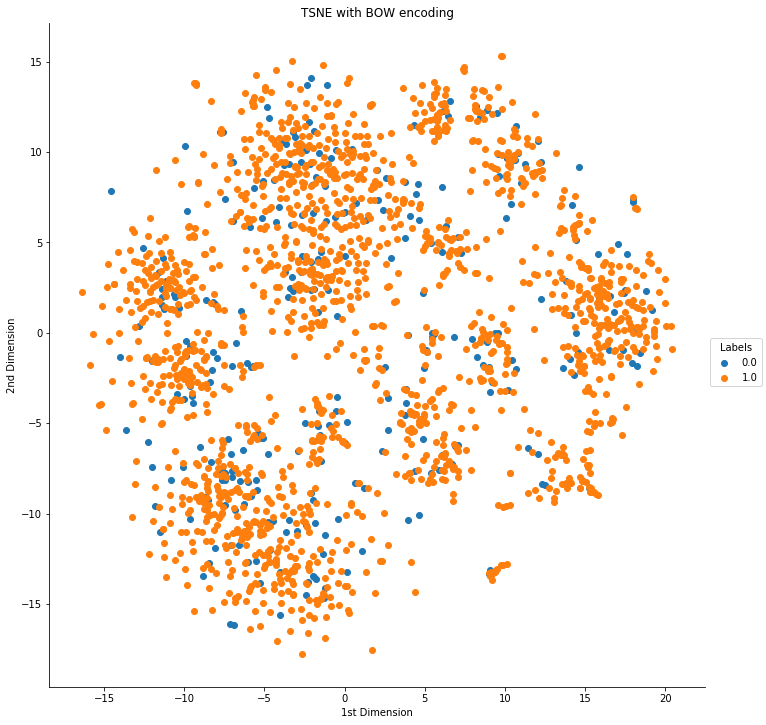

In [205]:
sns.FacetGrid(tsne_df_b, hue = "Labels", size = 10).map(plt.scatter, "1st Dimension", "2nd Dimension").add_legend()
plt.title("TSNE with BOW encoding")
plt.show()


## 1.5.2 TSNE with TFIDF encoding

In [206]:
X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, state_one_hot, prefix_one_hot, grade_one_hot,
           quantity_scalar_standardized, previous_posted_standardized, title_tfidf))

X.shape

(109248, 3431)

In [207]:
X = X.tocsr()
X_new = X[0 : 2000, :]


In [208]:
X_new = X_new.toarray()
model = TSNE(n_components = 2, perplexity = 100.0, random_state=0)
tsne_data_tfidf = model.fit_transform(X_new)


In [209]:
tsne_data_tfidf = np.vstack((tsne_data_tfidf.T, labels_new)).T
tsne_df_tfidf = pd.DataFrame(tsne_data_tfidf, columns = ("1st Dimension", "2nd Dimension", "Labels"))


In [210]:
tsne_df_tfidf.shape

(2000, 3)

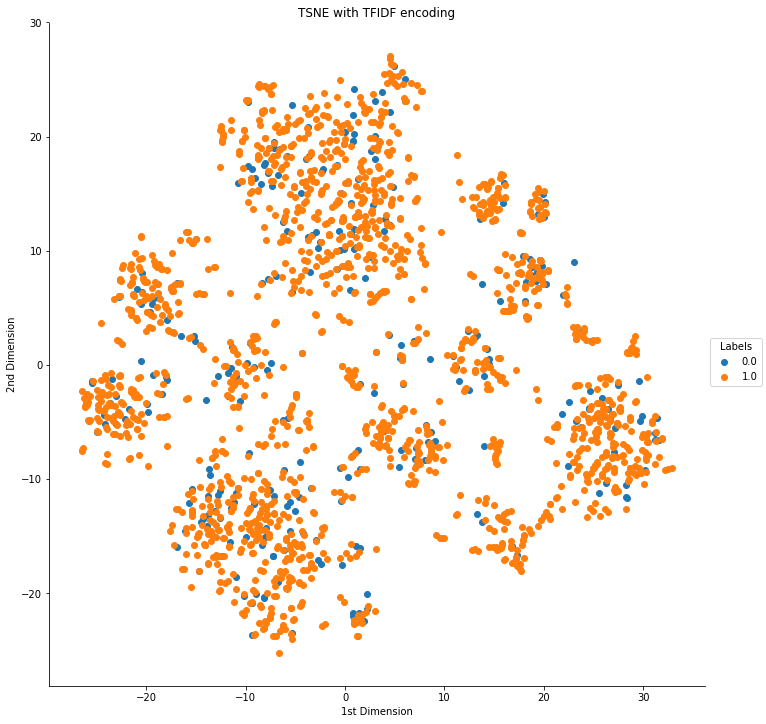

In [211]:
sns.FacetGrid(tsne_df_tfidf, hue = "Labels", size = 10).map(plt.scatter, "1st Dimension", "2nd Dimension").add_legend()
plt.title("TSNE with TFIDF encoding")
plt.show()

## 1.5.3 TSNE with Average W2v 

In [212]:
X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, state_one_hot, prefix_one_hot, grade_one_hot,
           quantity_scalar_standardized, previous_posted_standardized, avg_w2v_vectors_title))
X.shape

(109248, 402)

In [213]:
X = X.tocsr()
X_new = X[0:2000, : ]


In [214]:
X_new = X_new.toarray()
model = TSNE(n_components = 2, perplexity = 100.0, random_state=0)
tsne_data_avg_w2v = model.fit_transform(X_new)

In [215]:
tsne_data_avg_w2v = np.vstack((tsne_data_avg_w2v.T, labels_new)).T
tsne_df_avg_w2v = pd.DataFrame(tsne_data_avg_w2v, columns = ("1st Dimension", "2nd Dimension", "Labels"))


In [216]:
tsne_df_avg_w2v.shape

(2000, 3)

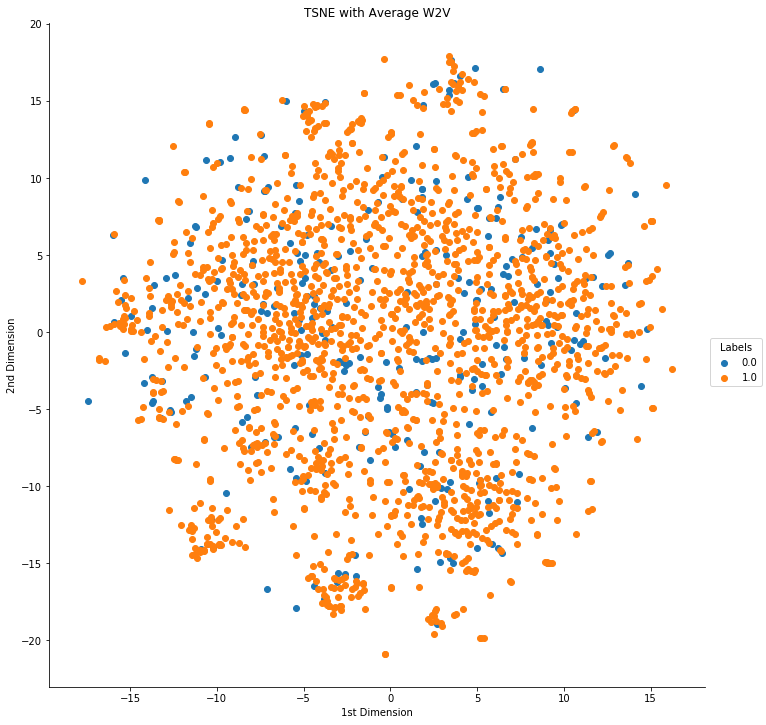

In [217]:
sns.FacetGrid(tsne_df_avg_w2v, hue = "Labels", size = 10).map(plt.scatter, "1st Dimension", "2nd Dimension").add_legend()
plt.title("TSNE with Average W2V")
plt.show()

### 1.5.4 TSNE with TFIDF weighted W2V

In [218]:
X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, state_one_hot, prefix_one_hot, grade_one_hot,
           quantity_scalar_standardized, previous_posted_standardized, tfidf_w2v_vectors_title))
X.shape

(109248, 402)

In [219]:
X = X.tocsr()
X_new = X[0:2000, :]



In [220]:
X_new = X_new.toarray()
model = TSNE(n_components = 2, perplexity =100.0, random_state=0)
tsne_data_tfidf_w2v = model.fit_transform(X_new)


In [221]:
tsne_data_tfidf_w2v = np.vstack((tsne_data_tfidf_w2v.T, labels_new)).T
tsne_df_tfidf_w2v = pd.DataFrame(tsne_data_tfidf_w2v, columns = ("1st Dimension", "2nd Dimension", "Labels"))


In [222]:
tsne_df_tfidf_w2v.shape

(2000, 3)

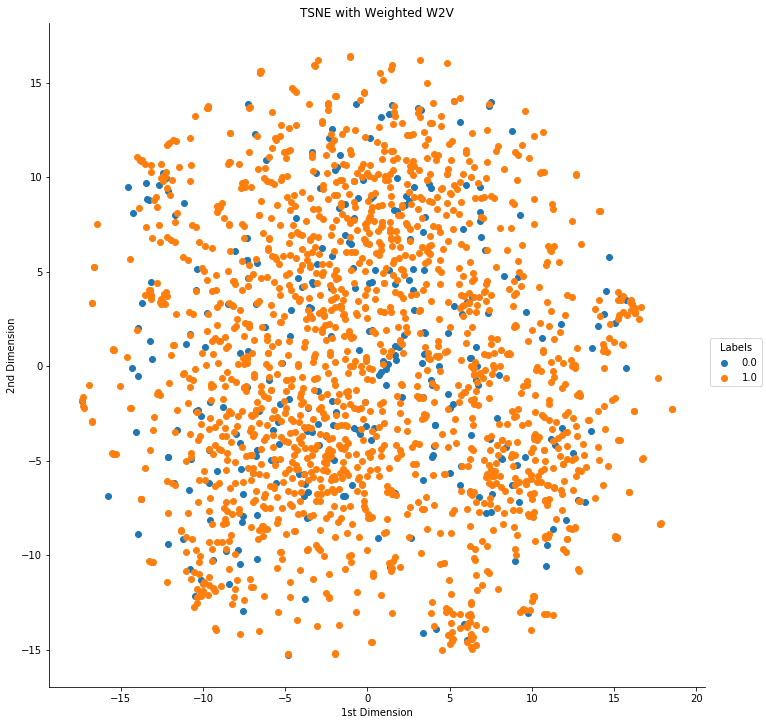

In [223]:
sns.FacetGrid(tsne_df_tfidf_w2v, hue = "Labels", size = 10).map(plt.scatter, "1st Dimension", "2nd Dimension").add_legend()
plt.title("TSNE with Weighted W2V")
plt.show()

# TSNE with BOW, TFIDF, AVG W2V, TFIDF Weighted W2V encoding

In [224]:
X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, state_one_hot, prefix_one_hot, grade_one_hot,
           quantity_scalar_standardized, previous_posted_standardized, title_bow, title_tfidf, avg_w2v_vectors_title, tfidf_w2v_vectors_title))


X.shape

(109248, 7360)

In [225]:
X = X.tocsr()
X_new = X[0 : 2000, :]


In [226]:
X_new = X_new.toarray()
model = TSNE(n_components = 2, perplexity = 100.0, random_state=0)
tsne_data_complete = model.fit_transform(X_new)


In [227]:
tsne_data_complete = np.vstack((tsne_data_complete.T, labels_new)).T
tsne_df_complete = pd.DataFrame(tsne_data_complete, columns = ("1st Dimension", "2nd Dimension", "Labels"))


In [228]:
tsne_df_complete.shape

(2000, 3)

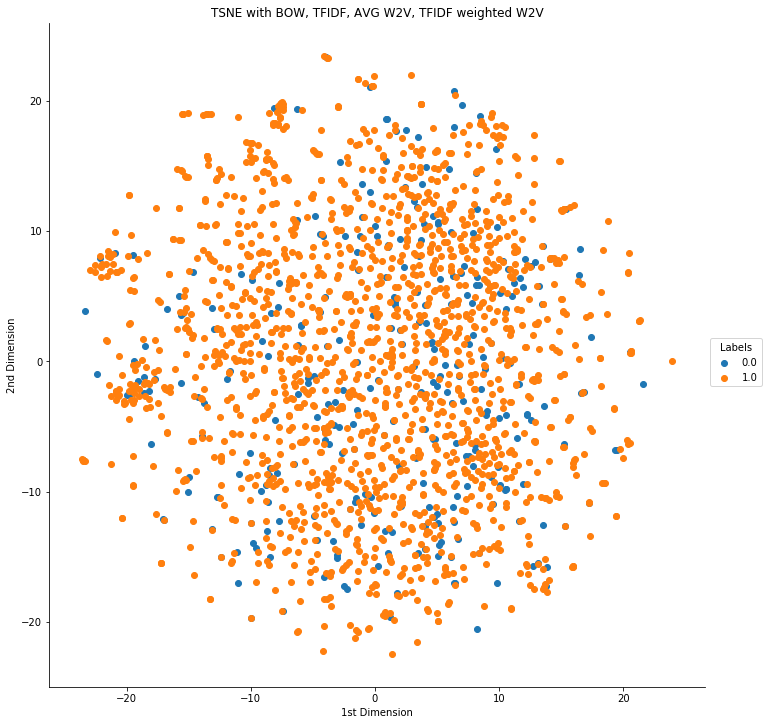

In [229]:
sns.FacetGrid(tsne_df_complete, hue = "Labels", size = 10).map(plt.scatter, "1st Dimension", "2nd Dimension").add_legend()
plt.title("TSNE with BOW, TFIDF, AVG W2V, TFIDF weighted W2V")
plt.show()

## Observation :

   ####  From the above 5 graphs (i) BOW, (ii) TFIDF, (iii) Avg W2V, (iv) TFIDF Weighted Word2Vec and (v) TSNE with all 4 methods graph, we could observe that
   
       - there are lot of overlappings between project approved and project not approved with the given features.
       - there is no proper clusters were able to get from the given features and considered data points (2000).
       - but the intensity of orange is more than blue were project approved is more intense compared to 
       project not approved. 
       - eventhough we could not come to proper conclusion from above methods.

## Conclusion :

 #### From the above Exploratory Data Analysis and TSNE, we could conclude that,
    
    - Project Title Feature is worthfull feature for EDA analysis.
    - along with it other features like categories, sub categories, School state, Project essays, project price, teachers previously posted projects counts are also considered useful for EDA which gives much intuition on the analysis.
    - Visualization with TSNE along with BOW, TFIDF, Avg W2V and TFIDF weighted Word2Vec doesnot provide much intuition about the data. 